In [2]:
%matplotlib notebook
import numpy as np
import scipy

from scipy import sparse
from scipy.sparse import linalg
from numpy import pi, sin

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

0.027777777777777776
Число шагов по x: 33


<IPython.core.display.Javascript object>


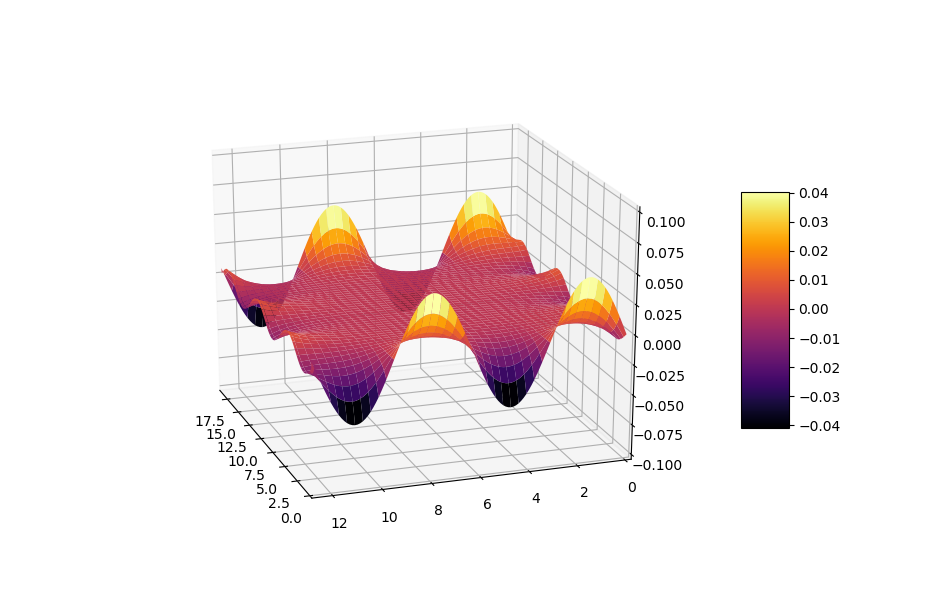

In [41]:
def mu(x,y):
    z = np.zeros((len(y),len(x)), dtype=np.longdouble)
    for i in range(len(x)):
        for j in range(len(y)):
            z[j][i] = -0.01*sin(x[i]) + 0.05*sin(y[j])
    return z

a = 6*pi
b = 4*pi
T = 10
hx = pi/30
hy = hx
k = 1.0
eps = 1e-12

lambda_x = (pi/a)**2*k
print(lambda_x)
lambda_xN = 4.0*(k/hx**2)
lambda_y = (pi/b)**2*k
lambda_yN = 4.0*(k/hy**2)

lambda_min = min(lambda_x, lambda_y)
lambda_max = max(lambda_xN, lambda_yN)

tau_min = 2.0/lambda_max
tau_max = 2.0/lambda_min

S= int(np.ceil(1/8.0 * np.log(1/eps) * np.log(lambda_max/lambda_min)))

print("Число шагов по x:",S)
x = np.arange(0, a+hx, hx, dtype=np.longdouble)
y = np.arange(0, b+hy, hy, dtype=np.longdouble)
t = np.array([np.exp(np.log(tau_min) + i*np.log(tau_max/tau_min)/(S-1)) for i in range(S)], dtype=np.longdouble)

u = np.zeros((len(t)+1, len(y), len(x)))
u[0] = mu(x,y)
for i in range(0,len(t)):
    u[i,0,:] = np.squeeze(mu(x,[0]))
    u[i,-1,:] = np.squeeze(mu(x,[b]))
    u[i,:,0] = np.squeeze(mu([0],y))
    u[i,:,-1] = np.squeeze(mu([a],y))

diff_op_x = np.zeros((len(x),len(x)))
for n in range(1, len(x)-1):
    diff_op_x[n][n-1] = 1
    diff_op_x[n][n] = -2
    diff_op_x[n][n+1] = 1
diff_op_x = k/hx**2 * diff_op_x.T

diff_op_y = np.zeros((len(y),len(y)))
for n in range(1, len(y)-1):
    diff_op_y[n][n-1] = 1
    diff_op_y[n][n] = -2
    diff_op_y[n][n+1] = 1
diff_op_y = k/hy**2 * diff_op_y

for i in range(len(t)):
    Px = np.eye(len(x)) - t[len(t)-i-1]*diff_op_x/2.0;
    Py = np.eye(len(y)) - t[len(t)-i-1]*diff_op_y/2.0;
    F = np.matrix(u[i])*np.matrix(diff_op_x) + np.matrix(diff_op_y)*np.matrix(u[i])
    nu = F*np.linalg.inv(Px)
    du = np.linalg.solve(Py, nu)
    du[0,:] = np.zeros(du[0,:].shape)
    du[-1,:] = np.zeros(du[-1,:].shape)
    du[:,0] = np.zeros(du[:,0].shape)
    du[:,-1] = np.zeros(du[:,-1].shape)
    u[i+1] = np.matrix(u[i]) + t[len(t)-i-1]*du

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.meshgrid(x, y)

# Plot the surface.
surf = ax.plot_surface(X, Y, u[-1], cmap=cm.inferno, linewidth=1, antialiased=True)
# Customize the z axis.
ax.set_zlim(-0.1,0.1)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlim(0,a)
ax.set_ylim(0,b)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

def animate(n):
    ax.clear()
    print(n)
    ax.set_zlim(-1.5,1.5)
    surf = ax.plot_surface(X, Y, u[n], cmap=cm.inferno, linewidth=0, antialiased=False)
    return surf,

#anim = animation.FuncAnimation(fig, animate, frames= u.shape[0], interval=100, repeat = False)

plt.show()

<IPython.core.display.Javascript object>


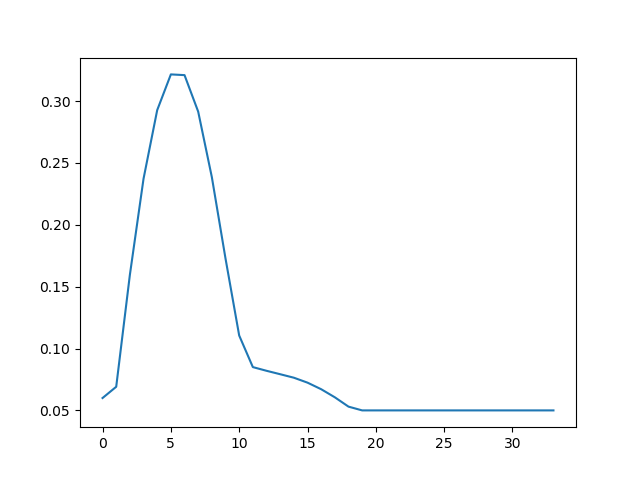

In [40]:
plt.figure()
plt.plot([ max(abs(p.flatten())) for p in u])

In [114]:
max(u[-1].flatten())

5.585118983064696e-17

In [93]:
u[0,0,:]-u[-1,0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [106]:
u[0,-1,:]-u[-1,-1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])